In [92]:
import pandas as pd
import numpy as np
import re
import string

In [93]:
coffee_shop = pd.read_csv("/Users/zhangjiawen/Desktop/STATS170A-B/Stat170-Project/yelp/coffee_info.csv")

In [94]:
photo_full = pd.read_json("/Users/zhangjiawen/Desktop/STATS170A-B/170-personalized/yelp/yelp_photos.tar/photos.json",lines = True)

In [95]:
coffee_photo = coffee_shop.merge(photo_full, on='business_id', how='left')
#coffee_photo = coffee_photo.replace(r'^\s*$', np.nan, regex=True)
#coffee_photo['caption'] = coffee_photo['caption'].fillna(np.nan)
coffee_photo = coffee_photo.dropna()

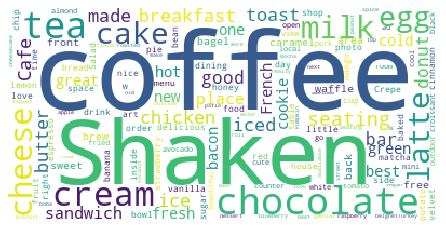

In [99]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
data = [item for item in list(coffee_photo['caption']) if item!=""]
text_s = ""
for s in data:
    text_s += s
clear_wordlist = re.sub('['+string.punctuation+']', '', text_s).split()

final_s = " ".join(w for w in clear_wordlist)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(final_s)

plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.gca().invert_yaxis()
plt.show()